In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hdf5storage as h5
from matplotlib.colors import ListedColormap

colors = ['white', 'green', 'red', 'blue', 'magenta']
custom_cmap = ListedColormap(colors)

In [2]:
def getRGBandGT(gtPath):
    img = h5.loadmat(gtPath)
    gt = img.get('groundTruthMap')
    rgb = img.get('dataResults')[0]['rgbImage'][0]
    #hs_cube = h5.loadmat(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\preProcessedImages\SNAPimagesID0038C02_cropped_Pre-processed.mat')

    gt[(gt == 101)] = 1
    gt[(gt == 200)] = 2
    gt[(gt == 301) | (gt == 302)] = 3
    gt[(gt == 320)] = 4

    return gt, rgb

C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  

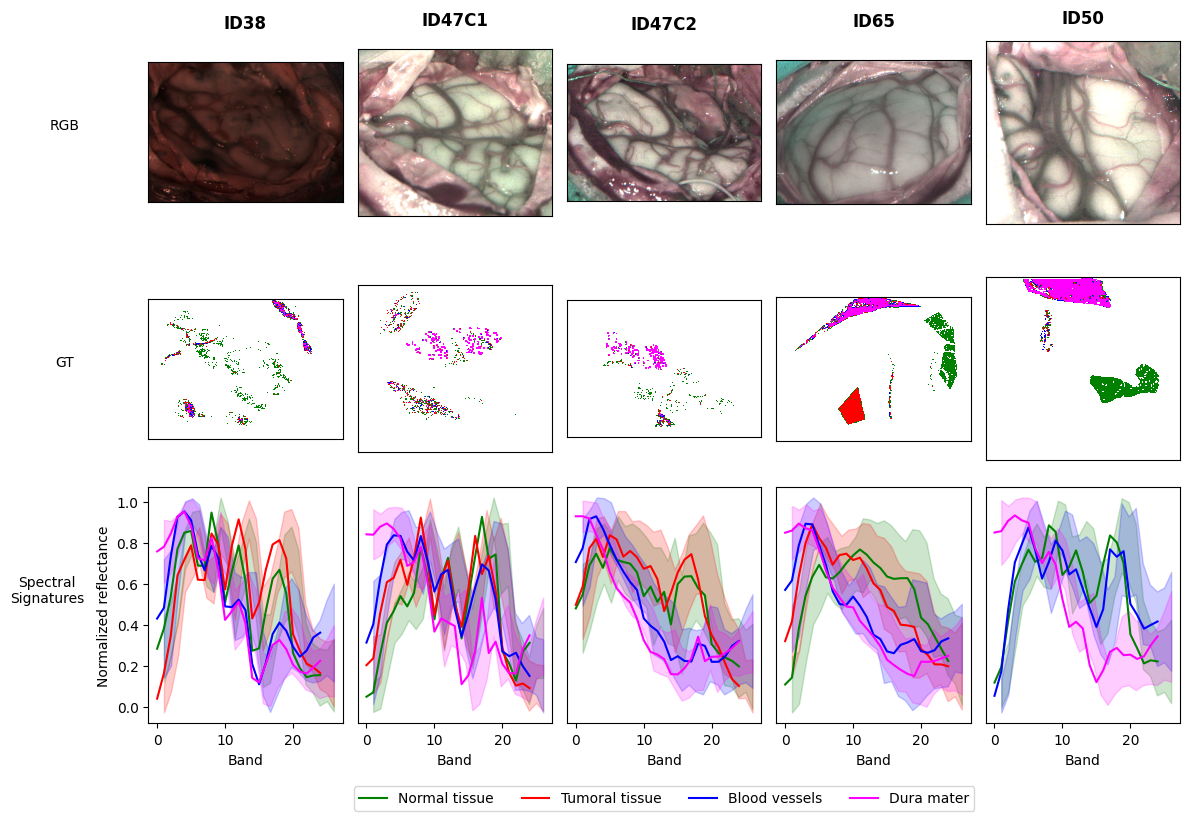

In [3]:
gt38, rgb38 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0038C02_cropped_Pre-processed.mat')
gt47C1, rgb47C1 = getRGBandGT(r'C:\Users\domen\Desktop\Data\ID_47_CN_2_Ximea Snapshot\SNAPgtID000047C02_cropped_Pre-processed.mat')
gt47C2, rgb47C2 = getRGBandGT(r'C:\Users\domen\Desktop\Data\ID_47_CN_8_Ximea Snapshot\SNAPgtID000047C08_cropped_Pre-processed.mat')
gt65, rgb65 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0065C01_cropped_Pre-processed.mat')
gt50, rgb50 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0050C02_cropped_Pre-processed.mat')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
axes[0,0].set_title('ID38', weight='bold', pad=25)
axes[0,0].imshow(rgb38)
axes[1,0].imshow(gt38, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,1].set_title('ID47C1', weight='bold', pad=17)
axes[0,1].imshow(rgb47C1)
axes[1,1].imshow(gt47C1, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,2].set_title('ID47C2', weight='bold', pad=25)
axes[0,2].imshow(rgb47C2)
axes[1,2].imshow(gt47C2, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,3].set_title('ID65', weight='bold', pad=25)
axes[0,3].imshow(rgb65)
axes[1,3].imshow(gt65, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,4].set_title('ID50', weight='bold', pad=13)
axes[0,4].imshow(rgb50)
axes[1,4].imshow(gt50, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,0].set_ylabel('RGB', rotation=0, labelpad=60)
axes[1,0].set_ylabel('GT', rotation=0, labelpad=60)
axes[2,0].set_ylabel('Spectral\nSignatures', rotation=0, labelpad=50)

fig.text(0.085, 0.22, 'Normalized reflectance', va='center', rotation='vertical')

for ax in axes.flat[:10]:
    ax.set_xticks([])
    ax.set_yticks([])

for ax in axes.flat[11:]:
    ax.set_yticks([])

files = [r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0038C02_dataset.mat', \
        r'C:\Users\domen\Desktop\Data\ID_47_CN_2_Ximea Snapshot\ID000047C02_dataset.mat', \
        r'C:\Users\domen\Desktop\Data\ID_47_CN_8_Ximea Snapshot\ID000047C08_dataset.mat', \
        r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0065C01_dataset.mat', \
        r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0050C02_dataset.mat']
x = np.linspace(1, 26, 25)

for i, name in enumerate(files):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)

    axes[2, i%5].plot(mean_norm, label='Normal tissue', color='green')
    axes[2, i%5].plot(mean_tumor, label='Tumoral tissue', color='red')
    axes[2, i%5].plot(mean_blood, label='Blood vessels', color='blue')
    axes[2, i%5].plot(mean_dura, label='Dura mater', color='magenta')

    axes[2, i%5].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='magenta', alpha=0.2)
    
    axes[2, i%5].set_xlabel('Band')
fig.tight_layout()
axes[2,2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)
plt.savefig(r'ViT paper images\spectrum1.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()


C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\domen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  

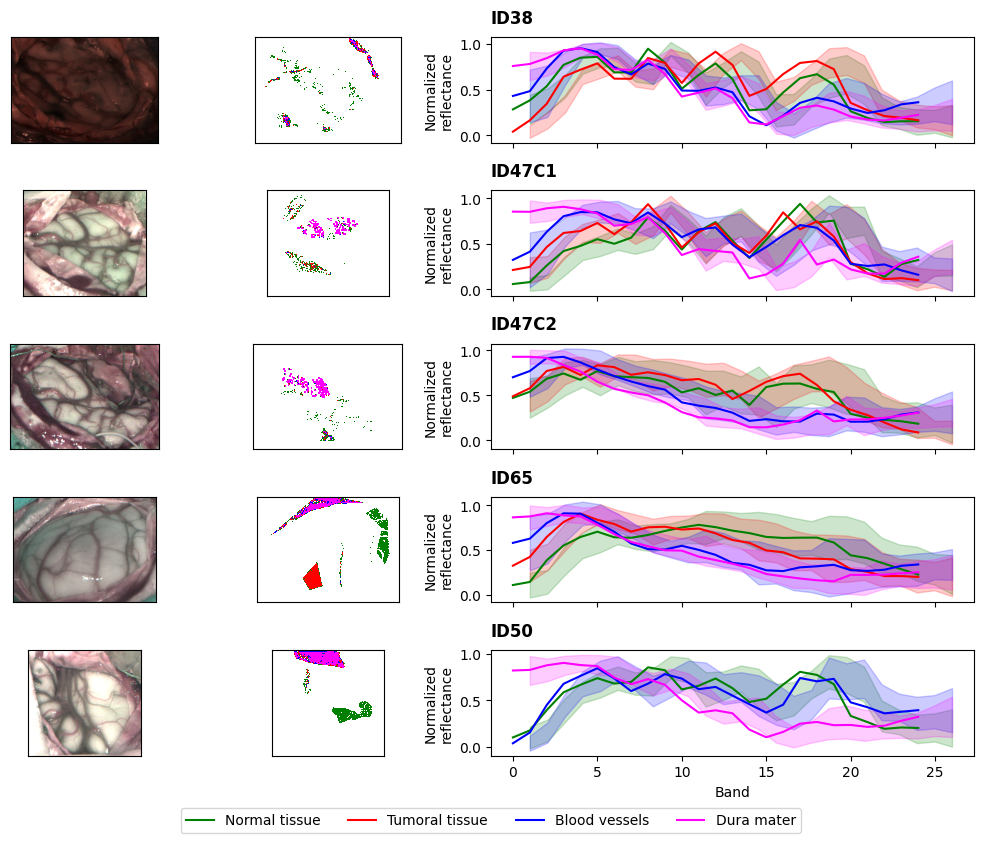

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), width_ratios=[1, 1, 3])

axes[0,2].set_title('ID38', weight='bold', pad=10, loc='left')
axes[0,0].imshow(rgb38)
axes[0,1].imshow(gt38, cmap=custom_cmap, vmin=0, vmax=4)

axes[1,2].set_title('ID47C1', weight='bold', pad=10, loc='left')
axes[1,0].imshow(rgb47C1)
axes[1,1].imshow(gt47C1, cmap=custom_cmap, vmin=0, vmax=4)

axes[2,2].set_title('ID47C2', weight='bold', pad=10, loc='left')
axes[2,0].imshow(rgb47C2)
axes[2,1].imshow(gt47C2, cmap=custom_cmap, vmin=0, vmax=4)

axes[3,2].set_title('ID65', weight='bold', pad=10, loc='left')
axes[3,0].imshow(rgb65)
axes[3,1].imshow(gt65, cmap=custom_cmap, vmin=0, vmax=4)

axes[4,2].set_title('ID50', weight='bold', pad=10, loc='left')
axes[4,0].imshow(rgb50)
axes[4,1].imshow(gt50, cmap=custom_cmap, vmin=0, vmax=4)

for i,ax in enumerate(axes.flat):
    if (i+1)%3 != 0:
        ax.set_xticks([])
        ax.set_yticks([])
    elif i+1 != 15:
        ax.set_xticklabels([])

for i, name in enumerate(files):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)

    axes[i,2].plot(mean_norm, label='Normal tissue', color='green')
    axes[i,2].plot(mean_tumor, label='Tumoral tissue', color='red')
    axes[i,2].plot(mean_blood, label='Blood vessels', color='blue')
    axes[i,2].plot(mean_dura, label='Dura mater', color='magenta')

    axes[i,2].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axes[i,2].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
    axes[i,2].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
    axes[i,2].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='magenta', alpha=0.2)
    
    axes[i,2].set_ylabel('Normalized\nreflectance')

fig.tight_layout()

axes[4,2].legend(loc='lower center', bbox_to_anchor=(0, -0.8), ncol=4)
axes[4,2].set_xlabel('Band')
plt.savefig(r'ViT paper images\spectrum3.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

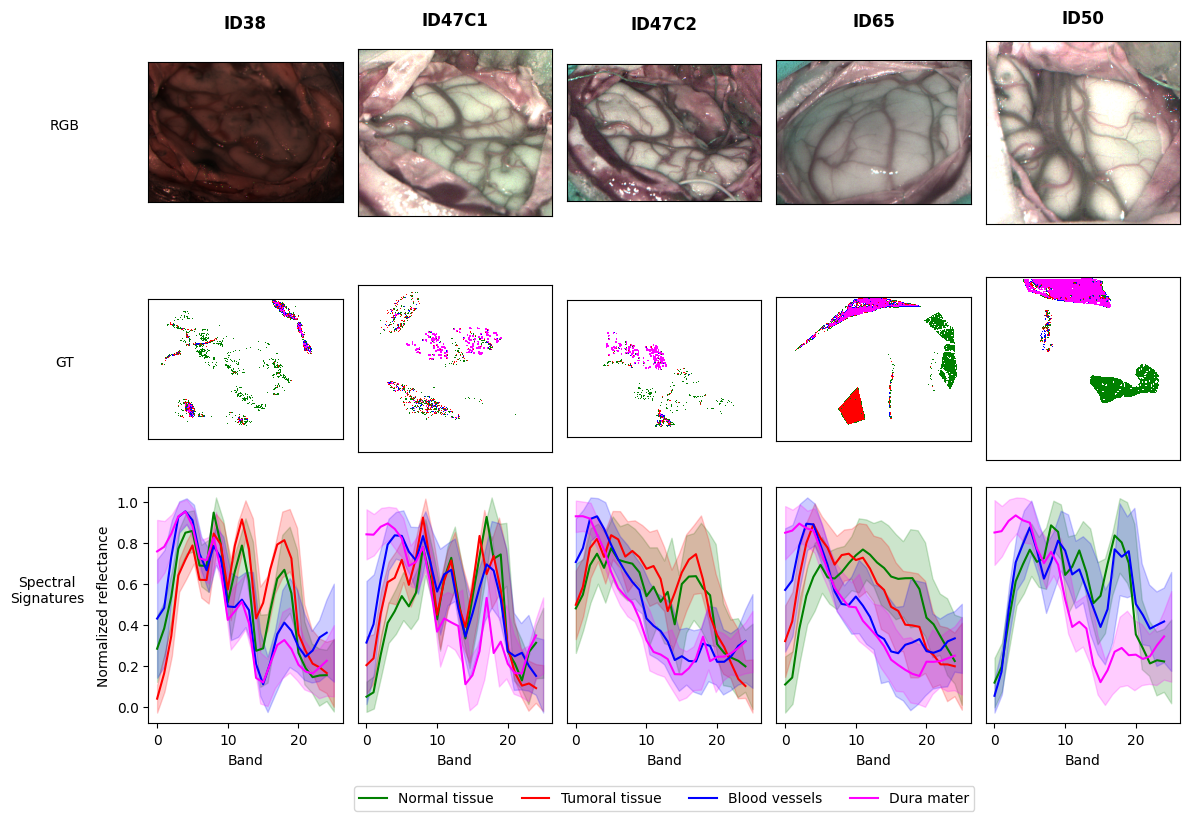

In [5]:
gt38, rgb38 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0038C02_cropped_Pre-processed.mat')
gt47C1, rgb47C1 = getRGBandGT(r'C:\Users\domen\Desktop\Data\ID_47_CN_2_Ximea Snapshot\SNAPgtID000047C02_cropped_Pre-processed.mat')
gt47C2, rgb47C2 = getRGBandGT(r'C:\Users\domen\Desktop\Data\ID_47_CN_8_Ximea Snapshot\SNAPgtID000047C08_cropped_Pre-processed.mat')
gt65, rgb65 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0065C01_cropped_Pre-processed.mat')
gt50, rgb50 = getRGBandGT(r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\GroundTruthMaps\SNAPgtID0050C02_cropped_Pre-processed.mat')


fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
axes[0,0].set_title('ID38', weight='bold', pad=25)
axes[0,0].imshow(rgb38)
axes[1,0].imshow(gt38, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,1].set_title('ID47C1', weight='bold', pad=17)
axes[0,1].imshow(rgb47C1)
axes[1,1].imshow(gt47C1, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,2].set_title('ID47C2', weight='bold', pad=25)
axes[0,2].imshow(rgb47C2)
axes[1,2].imshow(gt47C2, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,3].set_title('ID65', weight='bold', pad=25)
axes[0,3].imshow(rgb65)
axes[1,3].imshow(gt65, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,4].set_title('ID50', weight='bold', pad=13)
axes[0,4].imshow(rgb50)
axes[1,4].imshow(gt50, cmap=custom_cmap, vmin=0, vmax=4)

axes[0,0].set_ylabel('RGB', rotation=0, labelpad=60)
axes[1,0].set_ylabel('GT', rotation=0, labelpad=60)
axes[2,0].set_ylabel('Spectral\nSignatures', rotation=0, labelpad=50)

fig.text(0.085, 0.22, 'Normalized reflectance', va='center', rotation='vertical')

for ax in axes.flat[:10]:
    ax.set_xticks([])
    ax.set_yticks([])

for ax in axes.flat[11:]:
    ax.set_yticks([])

files = [r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0038C02_dataset.mat', \
        r'C:\Users\domen\Desktop\Data\ID_47_CN_2_Ximea Snapshot\ID000047C02_dataset.mat', \
        r'C:\Users\domen\Desktop\Data\ID_47_CN_8_Ximea Snapshot\ID000047C08_dataset.mat', \
        r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0065C01_dataset.mat', \
        r'C:\Users\domen\Desktop\UPM_UNIPV_colab_NEMESIS_HSI_images\Datasets\ID0050C02_dataset.mat']
x = np.linspace(0, 25, 25)

for i, name in enumerate(files):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)

    axes[2, i%5].plot(mean_norm, label='Normal tissue', color='green')
    axes[2, i%5].plot(mean_tumor, label='Tumoral tissue', color='red')
    axes[2, i%5].plot(mean_blood, label='Blood vessels', color='blue')
    axes[2, i%5].plot(mean_dura, label='Dura mater', color='magenta')

    axes[2, i%5].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
    axes[2, i%5].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='magenta', alpha=0.2)
    
    axes[2, i%5].set_xlabel('Band')
fig.tight_layout()
axes[2,2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)
#plt.savefig(r'ViT paper images\spectrum3.svg', format='svg', dpi=1200, bbox_inches='tight')
plt.show()

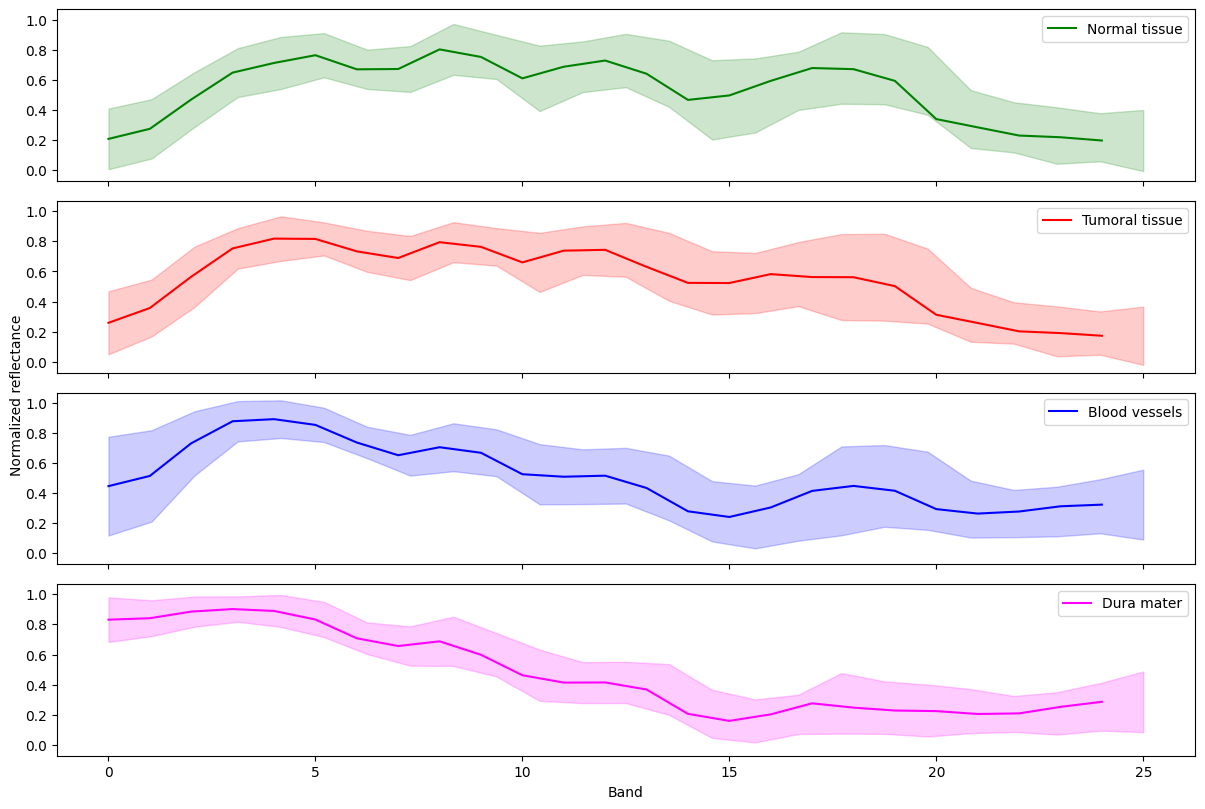

In [6]:
pixels_norm = []
pixels_blood = []
pixels_tumor = []
pixels_dura = []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

for i, name in enumerate(files):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm.extend(data_normalized[indices_norm[0],:])
    pixels_tumor.extend(data_normalized[indices_tumor[0],:])
    pixels_blood.extend(data_normalized[indices_blood[0],:])
    pixels_dura.extend(data_normalized[indices_dura[0],:])

mean_norm = np.mean(pixels_norm, axis=0)
std_norm = np.std(pixels_norm, axis=0)

mean_tumor = np.mean(pixels_tumor, axis=0)
std_tumor = np.std(pixels_tumor, axis=0)

mean_blood = np.mean(pixels_blood, axis=0)
std_blood = np.std(pixels_blood, axis=0)

mean_dura = np.mean(pixels_dura, axis=0)
std_dura = np.std(pixels_dura, axis=0)

axes[0].plot(mean_norm, label='Normal tissue', color='green')
axes[0].legend()
axes[1].plot(mean_tumor, label='Tumoral tissue', color='red')
axes[1].legend()
axes[2].plot(mean_blood, label='Blood vessels', color='blue')
axes[2].legend()
axes[3].plot(mean_dura, label='Dura mater', color='magenta')
axes[3].legend()

axes[0].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
axes[1].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
axes[2].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
axes[3].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='magenta', alpha=0.2)

fig.tight_layout()
plt.xlabel('Band')
fig.text(0, 0.5, 'Normalized reflectance', va='center', rotation='vertical')
plt.savefig(r'ViT paper images\spectrum2.svg', format='svg', dpi=1200)
plt.show()

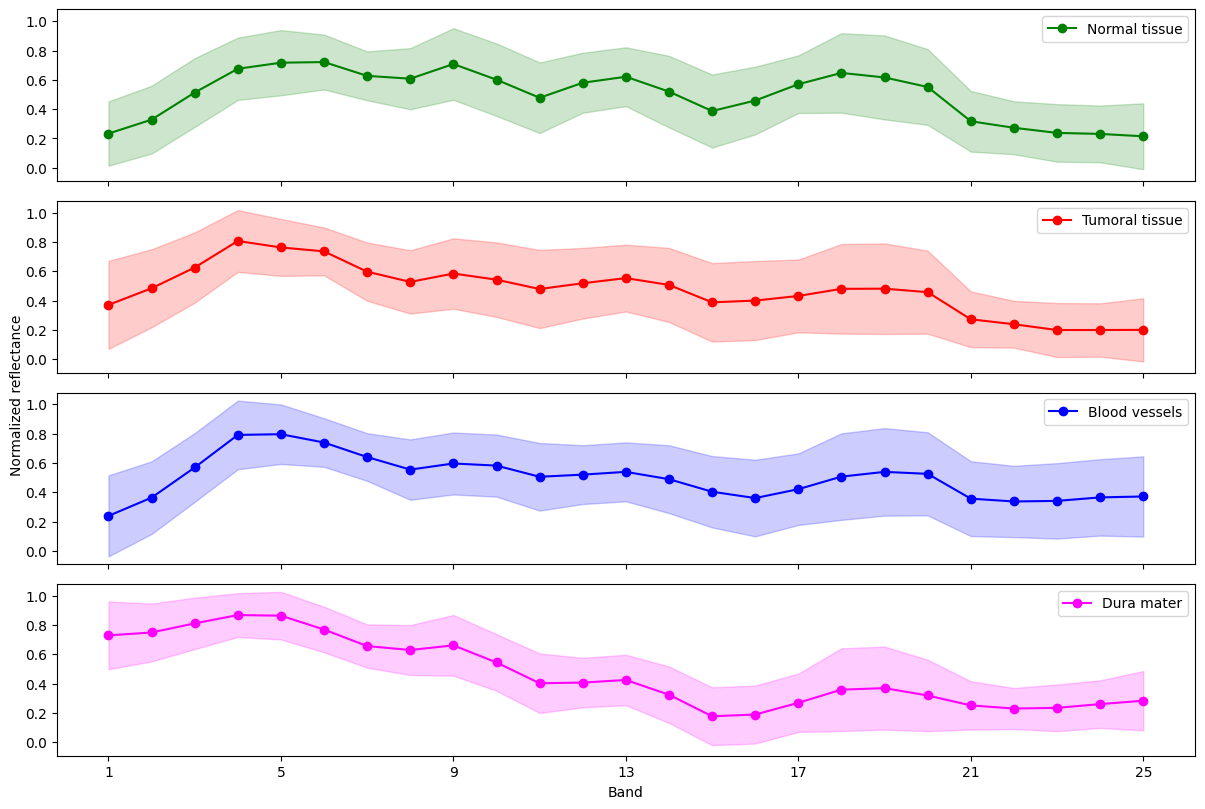

In [16]:
path = r'C:\Users\windows\Desktop\UniPV\PhD\Research\ViT for Brain Cancer\materials\dataset\UPM_UNIPV_colab_NEMESIS_HSI_images\datasets'
path2 = r'C:\Users\windows\Desktop\UniPV\PhD\Research\ViT for Brain Cancer\materials\dataset\UPM_UNIPV_colab_NEMESIS_HSI_images\extra_data'

files = [
    path+r'\ID0018C09_dataset.mat',
    path+r'\ID0025C02_dataset.mat',
    path2+r'\ID_29_CN_2_Ximea Snapshot'+r'\ID000029C02_dataset.mat',
    path2+r'\ID_33_CN_2_Ximea Snapshot'+r'\ID000033C02_dataset.mat',
    path+r'\ID0034C02_dataset.mat',
    path2+r'\ID_35_CN_2_Ximea Snapshot'+r'\ID000035C02_dataset.mat',
    path+r'\ID0038C02_dataset.mat',
    path2+r'\ID_47_CN_2_Ximea Snapshot'+r'\ID000047C02_dataset.mat',
    path2+r'\ID_47_CN_8_Ximea Snapshot'+r'\ID000047C08_dataset.mat',
    path+r'\ID0050C02_dataset.mat',
    path+r'\ID0051C02_dataset.mat',
    path2+r'\ID_56_CN_2_Ximea Snapshot'+r'\ID000056C02_dataset.mat',
    path+r'\ID0065C01_dataset.mat',
    path+r'\ID0067C01_dataset.mat',
    path2+r'\ID_70_CN_2_Ximea Snapshot'+r'\ID000070C02_dataset.mat',
    path+r'\ID0072C02_dataset.mat',
    path+r'\ID0075C05_dataset.mat',
    path+r'\ID0084C02_dataset.mat'
]
x = np.linspace(1, 25, 25)

pixels_norm = []
pixels_blood = []
pixels_tumor = []
pixels_dura = []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
plt.xticks(np.arange(1, 26, 4))

for i, name in enumerate(files):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm.extend(data_normalized[indices_norm[0],:])
    pixels_tumor.extend(data_normalized[indices_tumor[0],:])
    pixels_blood.extend(data_normalized[indices_blood[0],:])
    pixels_dura.extend(data_normalized[indices_dura[0],:])

mean_norm = np.mean(pixels_norm, axis=0)
std_norm = np.std(pixels_norm, axis=0)

mean_tumor = np.mean(pixels_tumor, axis=0)
std_tumor = np.std(pixels_tumor, axis=0)

mean_blood = np.mean(pixels_blood, axis=0)
std_blood = np.std(pixels_blood, axis=0)

mean_dura = np.mean(pixels_dura, axis=0)
std_dura = np.std(pixels_dura, axis=0)

axes[0].plot(x, mean_norm, marker='o', label='Normal tissue', color='green')
axes[0].legend()
axes[1].plot(x, mean_tumor, marker='o', label='Tumoral tissue', color='red')
axes[1].legend()
axes[2].plot(x, mean_blood, marker='o', label='Blood vessels', color='blue')
axes[2].legend()
axes[3].plot(x, mean_dura, marker='o', label='Dura mater', color='magenta')
axes[3].legend()

axes[0].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
axes[1].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
axes[2].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
axes[3].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='magenta', alpha=0.2)

fig.tight_layout()
plt.xlabel('Band')
fig.text(0, 0.5, 'Normalized reflectance', va='center', rotation='vertical')
plt.savefig(r'spectrum2.svg', format='svg', dpi=300)
plt.show()